In [1]:
import pandas as pd
import yfinance as yf

# Завантаження даних про золото
gold_data = yf.download('GC=F', start='2020-01-01', end='2024-07-01')
# Вибір колонок "Date" та "Close" (ціна закриття)
gold_data = gold_data[['Close']].copy()
gold_data.reset_index(inplace=True)
gold_data.rename(columns={'Close': 'Price', 'Date': 'Date'}, inplace=True)
# Збереження у форматі CSV
gold_data.to_csv('gold_price_data.csv', index=False)

# Завантаження даних про індекс S&P 500
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2024-07-01')
# Вибір колонок "Date" та "Close" (ціна закриття)
sp500_data = sp500_data[['Close']].copy()
sp500_data.reset_index(inplace=True)
sp500_data.rename(columns={'Close': 'Price', 'Date': 'Date'}, inplace=True)
# Збереження у форматі CSV
sp500_data.to_csv('sp500_price_data.csv', index=False)

# Виведення перших рядків для обох DataFrame
print("Gold Data:")
print(gold_data.head())

print("\nS&P 500 Data:")
print(sp500_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Gold Data:
        Date        Price
0 2020-01-02  1524.500000
1 2020-01-03  1549.199951
2 2020-01-06  1566.199951
3 2020-01-07  1571.800049
4 2020-01-08  1557.400024

S&P 500 Data:
        Date        Price
0 2020-01-02  3257.850098
1 2020-01-03  3234.850098
2 2020-01-06  3246.280029
3 2020-01-07  3237.179932
4 2020-01-08  3253.050049


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


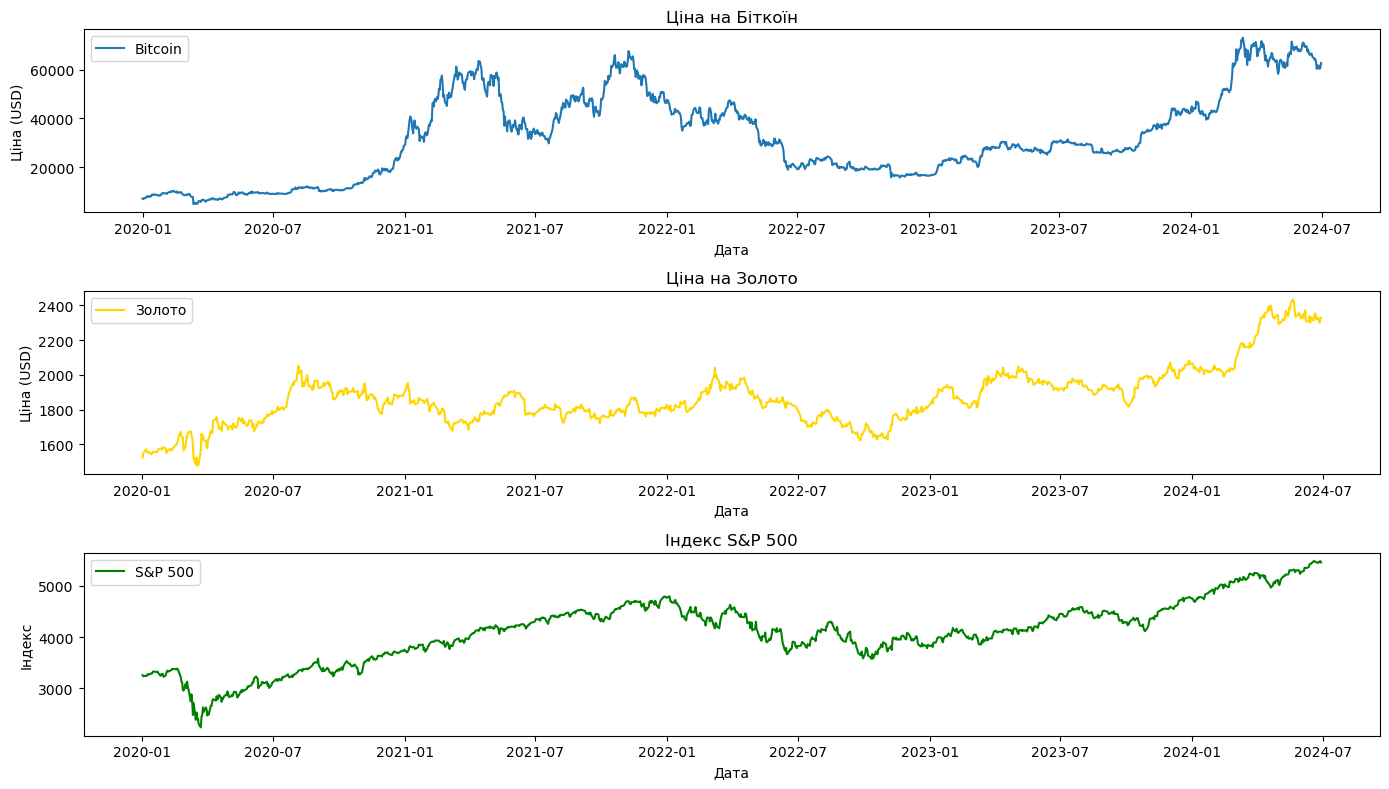

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Завантаження даних про біткоїн
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-07-01')
btc_data = btc_data[['Close']].copy()
btc_data.reset_index(inplace=True)
btc_data.rename(columns={'Close': 'Price', 'Date': 'Date'}, inplace=True)
btc_data.to_csv('btc_price_data.csv', index=False)

# Завантаження даних про золото
gold_data = yf.download('GC=F', start='2020-01-01', end='2024-07-01')
gold_data = gold_data[['Close']].copy()
gold_data.reset_index(inplace=True)
gold_data.rename(columns={'Close': 'Price', 'Date': 'Date'}, inplace=True)
gold_data.to_csv('gold_price_data.csv', index=False)

# Завантаження даних про індекс S&P 500
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2024-07-01')
sp500_data = sp500_data[['Close']].copy()
sp500_data.reset_index(inplace=True)
sp500_data.rename(columns={'Close': 'Price', 'Date': 'Date'}, inplace=True)
sp500_data.to_csv('sp500_price_data.csv', index=False)

# Побудова графіків
plt.figure(figsize=(14, 8))

# Графік для біткоїну
plt.subplot(3, 1, 1)
plt.plot(btc_data['Date'], btc_data['Price'], label='Bitcoin')
plt.title('Ціна на Біткоїн')
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()

# Графік для золота
plt.subplot(3, 1, 2)
plt.plot(gold_data['Date'], gold_data['Price'], label='Золото', color='gold')
plt.title('Ціна на Золото')
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()

# Графік для S&P 500
plt.subplot(3, 1, 3)
plt.plot(sp500_data['Date'], sp500_data['Price'], label='S&P 500', color='green')
plt.title('Індекс S&P 500')
plt.xlabel('Дата')
plt.ylabel('Індекс')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Кореляційна матриця:
             BTC_Price  Gold_Price  SP500_Price
BTC_Price     1.000000    0.544978     0.840165
Gold_Price    0.544978    1.000000     0.682964
SP500_Price   0.840165    0.682964     1.000000


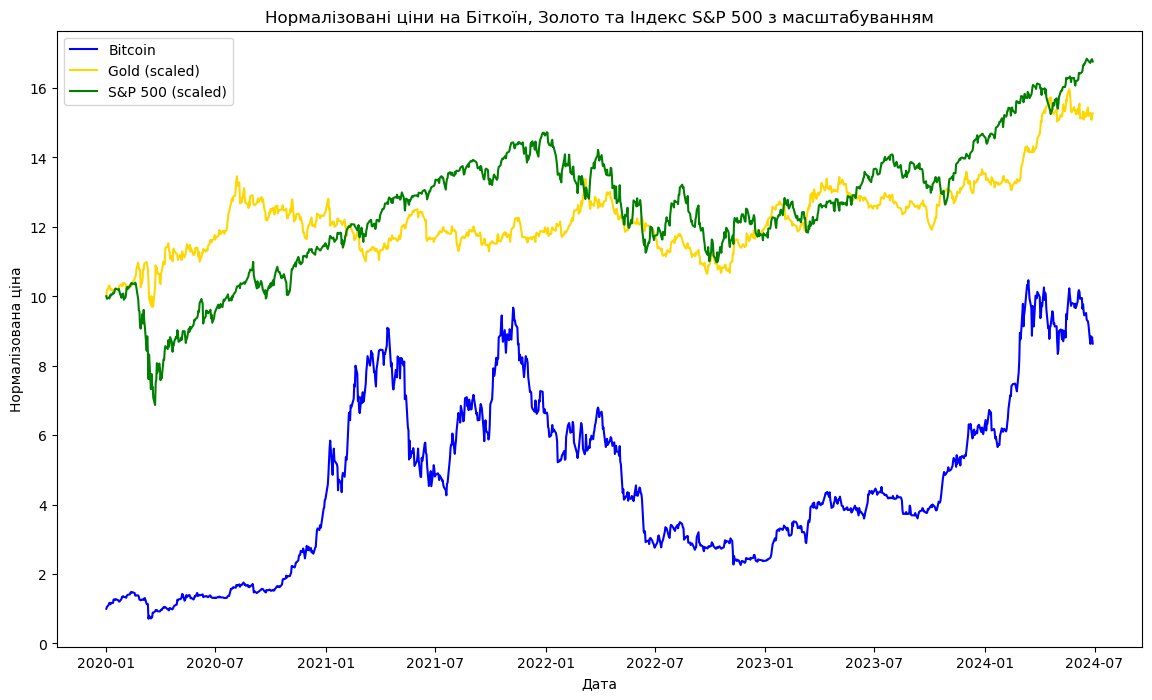

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Завантаження даних про біткоїн
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-07-01')
btc_data = btc_data[['Close']].copy()
btc_data.reset_index(inplace=True)
btc_data.rename(columns={'Close': 'BTC_Price', 'Date': 'Date'}, inplace=True)

# Завантаження даних про золото
gold_data = yf.download('GC=F', start='2020-01-01', end='2024-07-01')
gold_data = gold_data[['Close']].copy()
gold_data.reset_index(inplace=True)
gold_data.rename(columns={'Close': 'Gold_Price', 'Date': 'Date'}, inplace=True)

# Завантаження даних про індекс S&P 500
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2024-07-01')
sp500_data = sp500_data[['Close']].copy()
sp500_data.reset_index(inplace=True)
sp500_data.rename(columns={'Close': 'SP500_Price', 'Date': 'Date'}, inplace=True)

# Об'єднання даних за датою
merged_data = pd.merge(btc_data, gold_data, on='Date')
merged_data = pd.merge(merged_data, sp500_data, on='Date')

# Нормалізація даних
merged_data['BTC_Price_Normalized'] = merged_data['BTC_Price'] / merged_data['BTC_Price'].iloc[0]
merged_data['Gold_Price_Normalized'] = merged_data['Gold_Price'] / merged_data['Gold_Price'].iloc[0]
merged_data['SP500_Price_Normalized'] = merged_data['SP500_Price'] / merged_data['SP500_Price'].iloc[0]

# Масштабування даних для кращої візуалізації
gold_scaling_factor = 10
sp500_scaling_factor = 10
merged_data['Gold_Price_Scaled'] = merged_data['Gold_Price_Normalized'] * gold_scaling_factor
merged_data['SP500_Price_Scaled'] = merged_data['SP500_Price_Normalized'] * sp500_scaling_factor

# Збереження об'єднаних даних у CSV
merged_data.to_csv('merged_price_data_normalized_scaled.csv', index=False)

# Кореляційний аналіз
correlation_matrix = merged_data[['BTC_Price', 'Gold_Price', 'SP500_Price']].corr()
print("Кореляційна матриця:")
print(correlation_matrix)

# Побудова графіків на одному графіку
plt.figure(figsize=(14, 8))

plt.plot(merged_data['Date'], merged_data['BTC_Price_Normalized'], label='Bitcoin', color='blue')
plt.plot(merged_data['Date'], merged_data['Gold_Price_Scaled'], label='Gold (scaled)', color='gold')
plt.plot(merged_data['Date'], merged_data['SP500_Price_Scaled'], label='S&P 500 (scaled)', color='green')

plt.title('Нормалізовані ціни на Біткоїн, Золото та Індекс S&P 500 з масштабуванням')
plt.xlabel('Дата')
plt.ylabel('Нормалізована ціна')
plt.legend()

plt.show()
